# 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import misc
import glob
import warnings
np.random.seed(1)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def load_mnist():
    # Loads the MNIST dataset from png images
 
    NUM_LABELS = 10        
    # create list of image objects
    test_images = []
    test_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Test/" + str(label) + "/*.png"):
            image = misc.imread(image_path)
            test_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            test_labels.append(letter)  
            
    # create list of image objects
    train_images = []
    train_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Train/" + str(label) + "/*.png"):
            image = misc.imread(image_path)
            train_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            train_labels.append(letter)                  
            
    X_train= np.array(train_images).reshape(-1,784)/255.0
    Y_train= np.array(train_labels)
    X_test= np.array(test_images).reshape(-1,784)/255.0
    Y_test= np.array(test_labels)
    
    return X_train, Y_train, X_test, Y_test

In [3]:
X_train, Y_train, X_test, Y_test = load_mnist()

In [4]:
x_train_image = X_train.reshape(X_train.shape[0],28,28)

In [5]:
x_test_image = X_test.reshape(X_test.shape[0],28,28)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

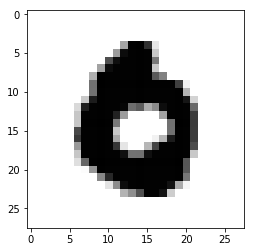

In [6]:
plt.imshow(x_train_image[1], cmap=plt.cm.binary)
Y_train[1] # Ok, working

In [7]:
X_train.shape

(60000, 784)

In [10]:
Y_train.shape

(60000, 10)

In [13]:
# Initialization of the parameters through initialize() function. 
# The weights were chosen randomly using a normal distribution with gaussians.
# The transpose of x_train is initialized for future matrix operations. 
# The initial offset b = 0 and min_cost = 0.001 indirectly controls the number of iterations to 
# minimize the cost function by breaking the self-consistent loop when the cost function is lower than 0.001
# loc = mean of the normal distribution, size = shape of the output, scale = standard deviation
def initialize(x_train,y_train):
    std_gaussian=0.01
    alpha = -0.8
    min_cost = 0.001
    epoch=10
    batch_size=100
    counter = 0
    w = np.random.normal(size = ([x_train.shape[1],y_train.shape[1]]),loc=0,scale=std_gaussian) 
    n = x_train.shape[0]
    x = np.transpose(x_train)
    b = np.zeros([y_train.shape[1]])
    iterations=int(n/batch_size) # automated - based on the batch size
    return w,x,n,b,alpha,min_cost,epoch,batch_size,counter,iterations

In [14]:
# Definition of activation function sigma(z) based on the sigmoid. 
# This function needs to be called by defining the type of activation function. i.e sigma(z,activation='sigmoid'). 
# This is important if we explore possible different activation functions in the next assignments.
def sigma(z_i,activation=False):
    if(activation==False):
        return print('Please choose an activation function')
    elif(activation=='sigmoid'):
        p_ik = 1/(1+np.exp(-z_i))
        return p_ik
    elif(activation=='softmax'):
        z_ik = np.exp(z_i)
        sum_row=np.sum(z_ik,axis=1).reshape(-1,1)
        p_ik=np.divide(z_ik,sum_row)
        return p_ik
    elif(activation=='relu'):
        p_ik = np.maximum(0.0,z_i)
        return p_ik

In [15]:
# This function calculates the cross-entropy loss function and the cost function. 
# Instead of using for-loops element-wise operations are performed with arrays. 
# You need to define which type of loss function to use: cost_function(y_train,p_i,loss_function='cross_entropy')
def cost_function(y_in,p_in,loss_function=False): # Calculate the loss and cost function using entering arrays
    if(loss_function==False):
        return print('Please choose a loss function')
    elif(loss_function=='cross_entropy'):
        nb = y_in.shape[0]
        loss_calc = -np.sum(y_in*np.log(p_in),axis=1)
        cost_calc = (1/nb)*np.sum(loss_calc)
        return loss_calc,cost_calc

In [16]:
        
# This function calculates the gradients and performs matrix operations to estimate the partial derivatives. 
# dLdb represents the derivative of the loss function with respect to the offset parameter b. 
# dJdb = derivative of the cost function with respect to b and dJdw = derivative of the cost 
# function with respect to a specific j-th weight. 
# Numpy library was used for vectorization and to perform element-wise operations instead of for loops.  
def softmax_backward(p_in,y_in,x_in):
    n_in = y_in.shape[0]
    dLdb = p_in - y_in
    dJdb = (1/n_in)*np.sum(p_in-y_in,axis=0)
    dJdw = (1/n)*np.dot(np.transpose(x_in),dLdb) # vector dJ/dW_j to update w_j
    return dJdw,dJdb

In [17]:
# This function will randomly reshuffle X_train and Y_train with new indexes for the 
def random_batch(x_in,y_in):
    random_index = np.random.choice(x_in.shape[0],size = x_in.shape[0], replace= False)
    x_out = x_in[random_index]
    y_out = y_in[random_index]
    return x_out,y_out

In [18]:
def accuracy(x_acc,y_acc,w,b):
    z_acc = np.dot(x_acc,w)+b
    p_ik_acc=sigma(z_acc,activation='softmax') # probability using optimized parameters
    p_ik_max_acc= np.max(p_ik_acc,axis=1).reshape(-1,1) # find maximum for each row and reshape to column
    y_pred_acc=np.where(p_ik_acc>=p_ik_max_acc,1,0) # change p_ik to 1 in case the element of the row is >= maximum for row.
    acc=np.mean(y_pred_acc == y_acc) # Calculate the accuracy
    return acc

In [19]:
# Initialize w=weight, x=input vectors, n= number of input vectors 
# in the data set, alpha = learning rate, min_cost = control variable
w,x,n,b,alpha,min_cost,epoch,batch_size,counter,iterations=initialize(X_train,Y_train)

In [20]:
# Definition of a counter and threshold of min_cost = 0.001 for convergence. 
# This means that the parameters of the model are optimized. 
# All the previous operations are performed inside the loop until the break of the self-consistent while-loop.
#while(j>min_cost):
pred_acc=[]
pred_acc_test=[]
cost = []
for E in range(epoch):
    X_train_minibatch,Y_train_minibatch = random_batch(X_train,Y_train)
    for i in range(iterations):
        x_loop = X_train_minibatch[i*batch_size:(i+1)*batch_size,:]
        y_loop = Y_train_minibatch[i*batch_size:(i+1)*batch_size,:]
            # print(y_loop,i) debug ok
        z = np.dot(x_loop,w)+b
            # print(z,i)      debug ok 
        p_ik=sigma(z,activation='softmax')
            # print(p_ik,i)   debug ok
        l,j= cost_function(y_loop,p_ik,loss_function='cross_entropy')
        cost.append(j)
            # print(l,j,i)    debug ok
            # print('Cost Function =',j,'\n') debug ok
        dw,db= softmax_backward(p_ik,y_loop,x_loop)
            # print(dw,db,i)   debug ok
        w +=alpha*dw
        b +=alpha*db
        pred_acc.append(accuracy(x_loop,y_loop,w,b))
        pred_acc_test.append(accuracy(X_test,Y_test,w,b))
        counter+=1
    print('Epoch =',E,'; Cost Function =',j,'\n')
print('Number of iterations = ',counter)

Epoch = 0 ; Cost Function = 1.6471016550976811 

Epoch = 1 ; Cost Function = 1.2243675446685733 

Epoch = 2 ; Cost Function = 1.0389976684215234 

Epoch = 3 ; Cost Function = 0.9054793401752557 

Epoch = 4 ; Cost Function = 0.8749678694293305 

Epoch = 5 ; Cost Function = 0.7862897065275499 

Epoch = 6 ; Cost Function = 0.685124613094569 

Epoch = 7 ; Cost Function = 0.6787356900239685 

Epoch = 8 ; Cost Function = 0.7620675345399908 

Epoch = 9 ; Cost Function = 0.6358987838271825 

Number of iterations =  6000


In [21]:
x=np.arange(1,counter+1)

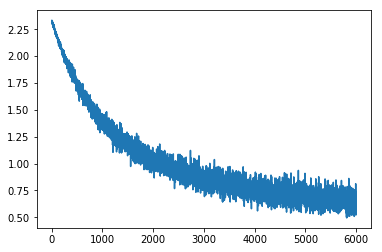

In [22]:
plt.plot(x,cost)

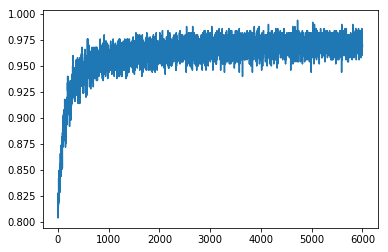

In [40]:
plt.plot(x,pred_acc)

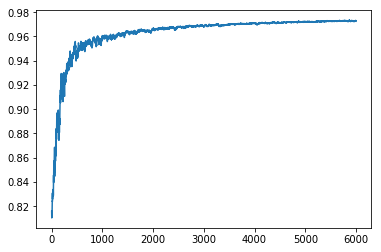

In [41]:
plt.plot(x,pred_acc_test)

In [25]:
accuracy(X_train,Y_train,w,b)

0.97131

In [26]:
accuracy(X_test,Y_test,w,b)

0.97268

In [48]:
w.shape

(784, 10)

In [33]:
w_pictures = w.T.reshape(10,28,-1)

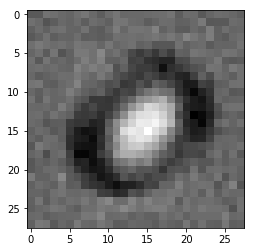

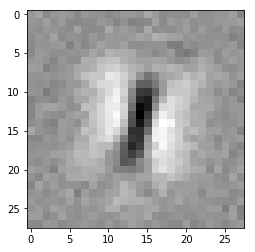

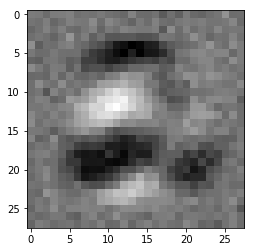

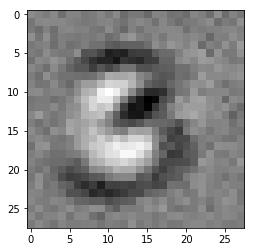

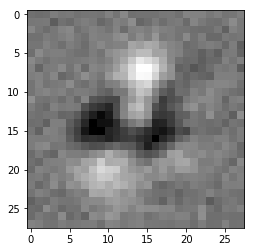

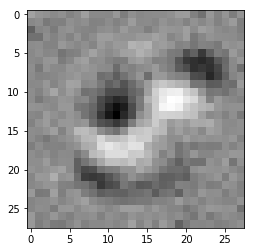

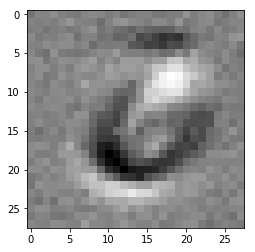

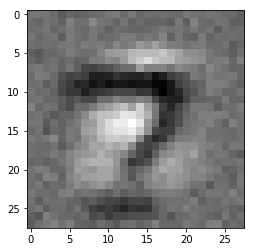

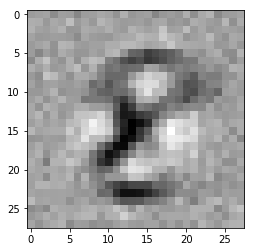

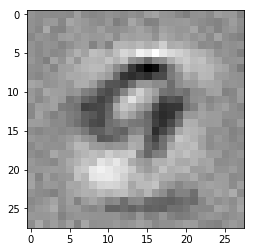

In [37]:
for i in range(w_pictures.shape[0]):
    plt.imshow(w_pictures[i], cmap=plt.cm.binary)
    plt.show()